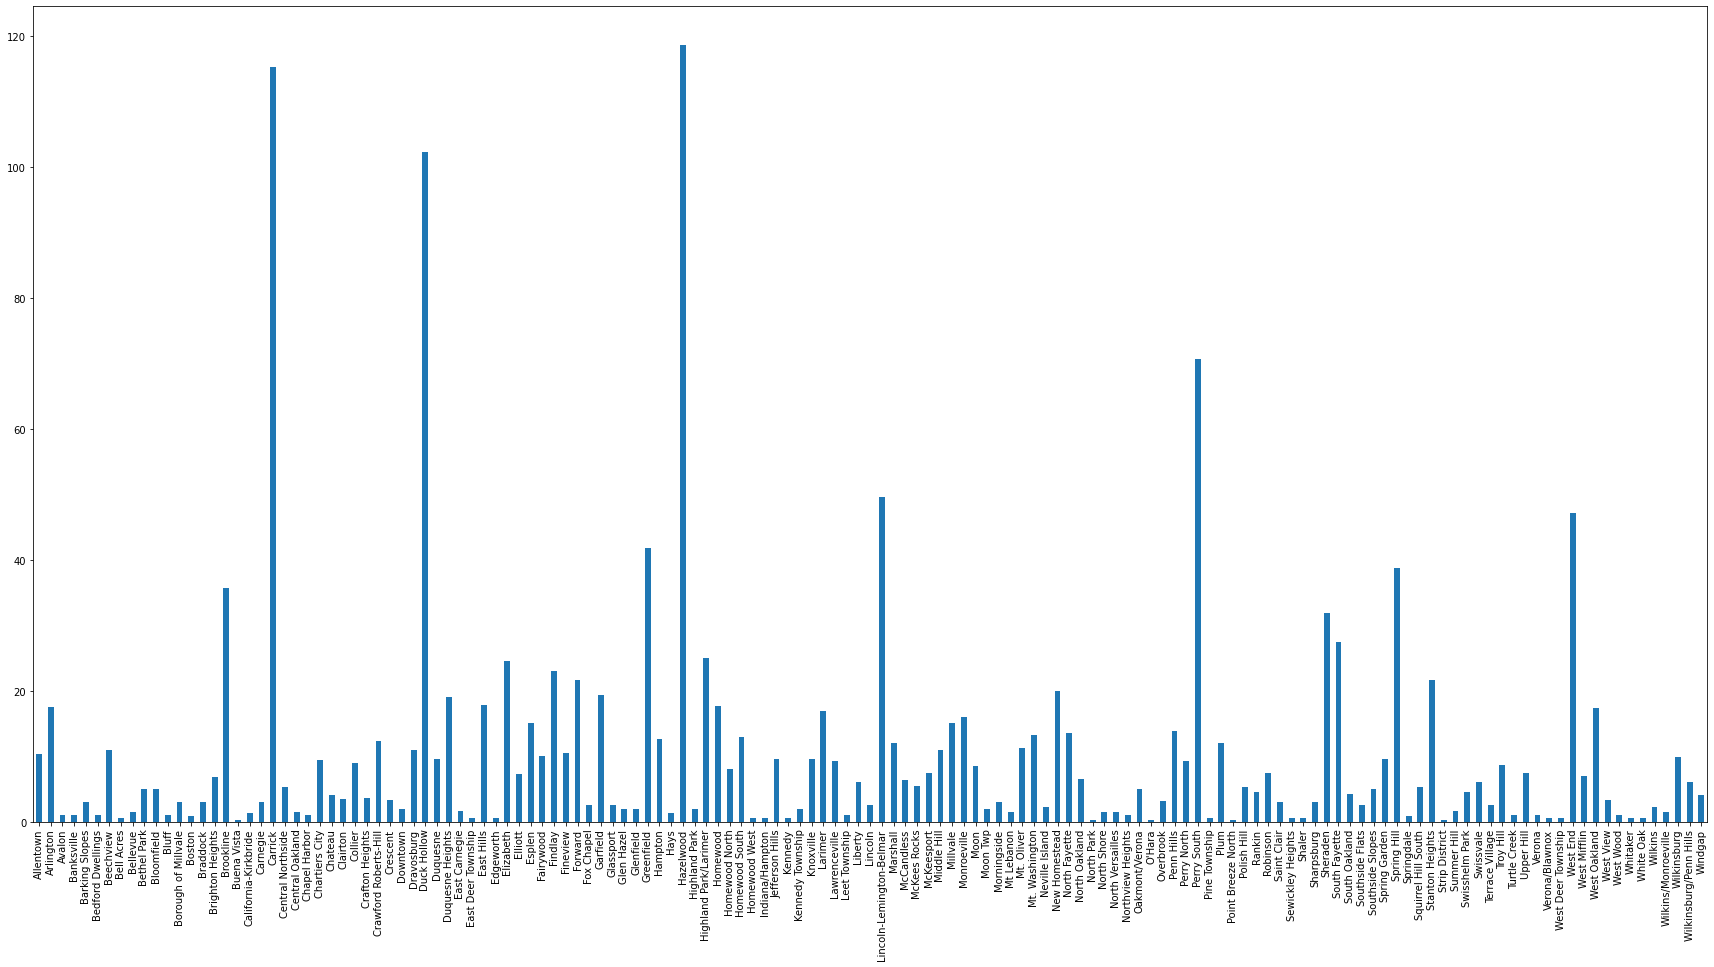

In [1]:
import pandas as pd
import geopandas
import numpy as np
import math
data = pd.read_csv("illegaldumpsites.csv")
neigh = []
tons = []
for index, row in data.iterrows():
    if (row["Neighborhood"] != "Partially" and not(math.isnan(float(row["estimated_tons"]))) and row["Neighborhood"] != "Beltzhoover"):
        try:
            ind = -1
            found = False
            for hood in neigh:
                ind += 1
                if (hood == row["Neighborhood"]):
                    tons[ind] += (float(row["estimated_tons"]))
                    found = True
            if (found == False):
                neigh.append(row["Neighborhood"])
                tons.append(float(row["estimated_tons"]))
        except:
            pass
#I removed a neighborhood called Beltzhoover because they had one dump of 999.9 tons of trash, which was majorly skewing the data
dumps = pd.Series(tons, index = neigh)
dumps.plot(kind='bar', figsize=(30, 15))
dumps = dumps.to_frame("count")

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

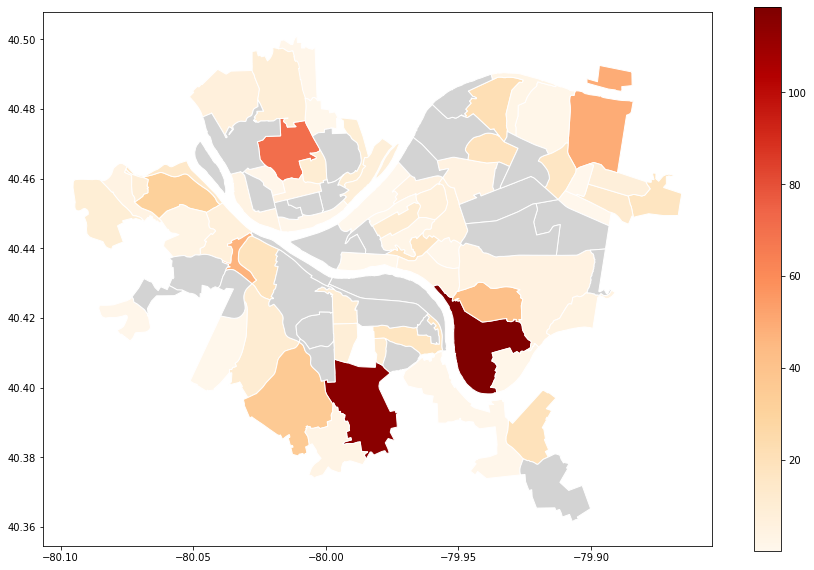

In [2]:
steps_map = neighborhoods.merge(dumps, how='left', left_on='hood', right_index=True)

steps_map.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )